In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Load pretrained MobileNetV2
model = MobileNetV2(weights='imagenet')

import cv2
import numpy as np

def extract_frames(video_path, max_frames=20):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Cannot open video")
        return np.array([])

    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Handle videos where frame count is 0
    if total_frames > 0:
        step = max(1, total_frames // max_frames)
    else:
        step = 1

    count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if count % step == 0:
            frame = cv2.resize(frame, (224, 224))
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # 🔴 Important fix
            frames.append(frame)

        count += 1

        if len(frames) >= max_frames:
            break

    cap.release()
    print("Extracted frames:", len(frames))
    return np.array(frames)



def classify_video(video_path):
    frames = extract_frames(video_path)

    if len(frames) == 0:
        print("No frames extracted!")
        return

    frames = preprocess_input(frames)
    predictions = model.predict(frames)

    # Average predictions across frames
    avg_pred = np.mean(predictions, axis=0)
    #top_pred = decode_predictions(np.expand_dims(avg_pred, axis=0), top=1)

    top_pred = decode_predictions(np.expand_dims(avg_pred, axis=0), top=5)

    for pred in top_pred[0]:
      print(pred[1], ":", round(pred[2]*100, 2), "%")


    print("Final Prediction:", top_pred[0][0][1])

# Replace with your video path
video_path = "real_world_demo_video.mp4"
classify_video(video_path)

Extracted frames: 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
digital_clock : 63.84 %
traffic_light : 9.13 %
switch : 1.43 %
computer_keyboard : 1.32 %
matchstick : 0.85 %
Final Prediction: digital_clock


In [ ]:
print(frames.shape)

(20, 224, 224, 3)


In [ ]:
frames = extract_frames(video_path)
if len(frames) > 0:
    print(f"Frames shape: {frames.shape}")
    print(f"First element of the first frame: {frames[0][0][0]}")
else:
    print("No frames were extracted.")

display(frames)

Extracted frames: 20
Frames shape: (20, 224, 224, 3)
First element of the first frame: [233 206 133]


array([[[[233, 206, 133],
         [233, 206, 133],
         [233, 206, 133],
         ...,
         [233, 206, 133],
         [233, 206, 133],
         [233, 206, 133]],

        [[233, 206, 133],
         [233, 206, 133],
         [233, 206, 133],
         ...,
         [233, 206, 133],
         [233, 206, 133],
         [233, 206, 133]],

        [[233, 206, 133],
         [233, 206, 133],
         [233, 206, 133],
         ...,
         [233, 206, 133],
         [233, 206, 133],
         [233, 206, 133]],

        ...,

        [[ 46,  48,  45],
         [ 46,  48,  45],
         [ 46,  48,  45],
         ...,
         [ 46,  48,  45],
         [ 46,  48,  45],
         [ 46,  48,  45]],

        [[ 46,  48,  45],
         [ 46,  48,  45],
         [ 46,  48,  45],
         ...,
         [ 46,  48,  45],
         [ 46,  48,  45],
         [ 46,  48,  45]],

        [[ 46,  48,  45],
         [ 46,  48,  45],
         [ 46,  48,  45],
         ...,
         [ 46,  48,  45],
        

Displaying 20 extracted frames in a grid...


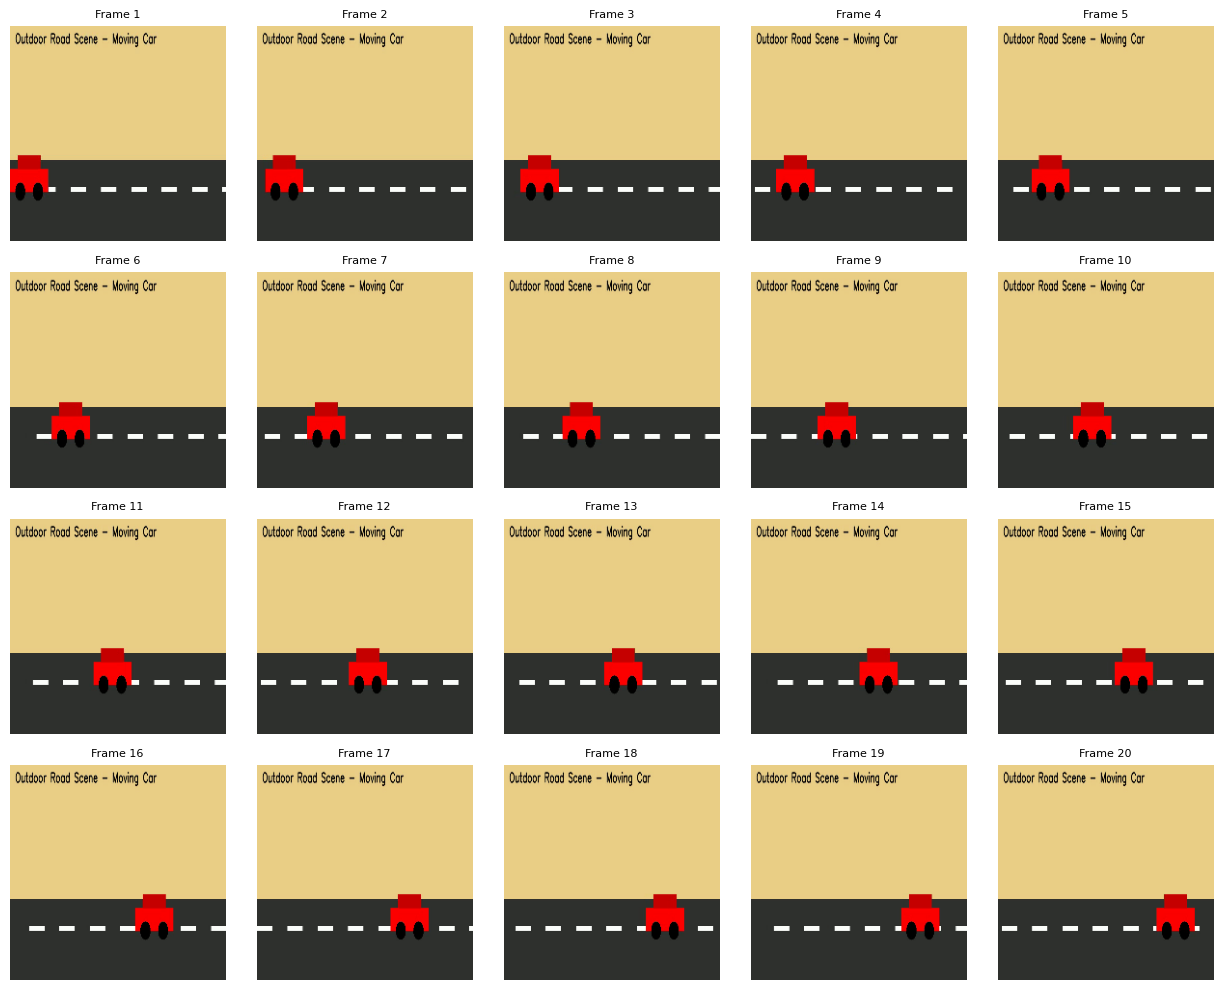

All frames displayed in a grid.


In [ ]:
import matplotlib.pyplot as plt
import cv2
import math

if 'frames' in locals() and len(frames) > 0:
    num_frames = len(frames)
    print(f"Displaying {num_frames} extracted frames in a grid...")

    # Calculate grid dimensions for a square-ish layout
    ncols = math.ceil(math.sqrt(num_frames))
    nrows = math.ceil(num_frames / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 2.5, nrows * 2.5)) # Adjust figsize as needed
    axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

    for i, frame in enumerate(frames):
        axes[i].imshow(frame)
        axes[i].set_title(f"Frame {i+1}", fontsize=8) # Smaller title font
        axes[i].axis('off') # Hide axes ticks and labels

    # Hide any unused subplots if the grid is larger than num_frames
    for j in range(num_frames, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    print("All frames displayed in a grid.")
else:
    print("No frames available to display.")

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Load pretrained MobileNetV2
model1 = MobileNetV2(weights='imagenet')

import cv2
import numpy as np

def extract_frames(video_path, max_frames=20):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Cannot open video")
        return np.array([])

    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Handle videos where frame count is 0
    if total_frames > 0:
        step = max(1, total_frames // max_frames)
    else:
        step = 1

    count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if count % step == 0:
            frame = cv2.resize(frame, (224, 224))
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # 🔴 Important fix
            frames.append(frame)

        count += 1

        if len(frames) >= max_frames:
            break

    cap.release()
    print("Extracted frames:", len(frames))
    return np.array(frames)



def classify_video(video_path):
    frames = extract_frames(video_path)

    if len(frames) == 0:
        print("No frames extracted!")
        return

    frames = preprocess_input(frames)
    predictions = model1.predict(frames)

    # Average predictions across frames
    avg_pred = np.mean(predictions, axis=0)
    #top_pred = decode_predictions(np.expand_dims(avg_pred, axis=0), top=1)

    top_pred = decode_predictions(np.expand_dims(avg_pred, axis=0), top=5)

    for pred in top_pred[0]:
      print(pred[1], ":", round(pred[2]*100, 2), "%")


    print("Final Prediction:", top_pred[0][0][1])

# Replace with your video path
video_path = "/content/026c7465-309f6d33.mp4"
classify_video(video_path)

Extracted frames: 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
cab : 17.92 %
traffic_light : 6.14 %
streetcar : 5.89 %
jinrikisha : 3.63 %
limousine : 3.56 %
Final Prediction: cab


In [ ]:
frames = extract_frames(video_path)
if len(frames) > 0:
    print(f"Frames shape: {frames.shape}")
    print(f"First element of the first frame: {frames[0][0][0]}")
else:
    print("No frames were extracted.")

display(frames)

Extracted frames: 20
Frames shape: (20, 224, 224, 3)
First element of the first frame: [60 67 53]


array([[[[ 60,  67,  53],
         [ 57,  63,  50],
         [125, 131, 119],
         ...,
         [  8,  13,  19],
         [  8,  13,  19],
         [  8,  13,  19]],

        [[ 55,  61,  48],
         [ 60,  66,  53],
         [ 83,  89,  77],
         ...,
         [  8,  13,  19],
         [  8,  13,  19],
         [  8,  13,  19]],

        [[ 48,  54,  41],
         [ 62,  67,  55],
         [ 68,  74,  63],
         ...,
         [  8,  12,  19],
         [  8,  12,  19],
         [  8,  12,  19]],

        ...,

        [[ 47,  46,  50],
         [ 52,  52,  60],
         [ 80,  80,  88],
         ...,
         [ 41,  39,  45],
         [ 39,  37,  43],
         [ 32,  32,  37]],

        [[ 85,  84,  89],
         [100, 100, 108],
         [ 77,  77,  85],
         ...,
         [ 42,  39,  45],
         [ 38,  35,  41],
         [ 34,  33,  38]],

        [[114, 113, 118],
         [ 78,  78,  86],
         [ 73,  73,  81],
         ...,
         [ 42,  39,  45],
        

Displaying 20 extracted frames in a grid...


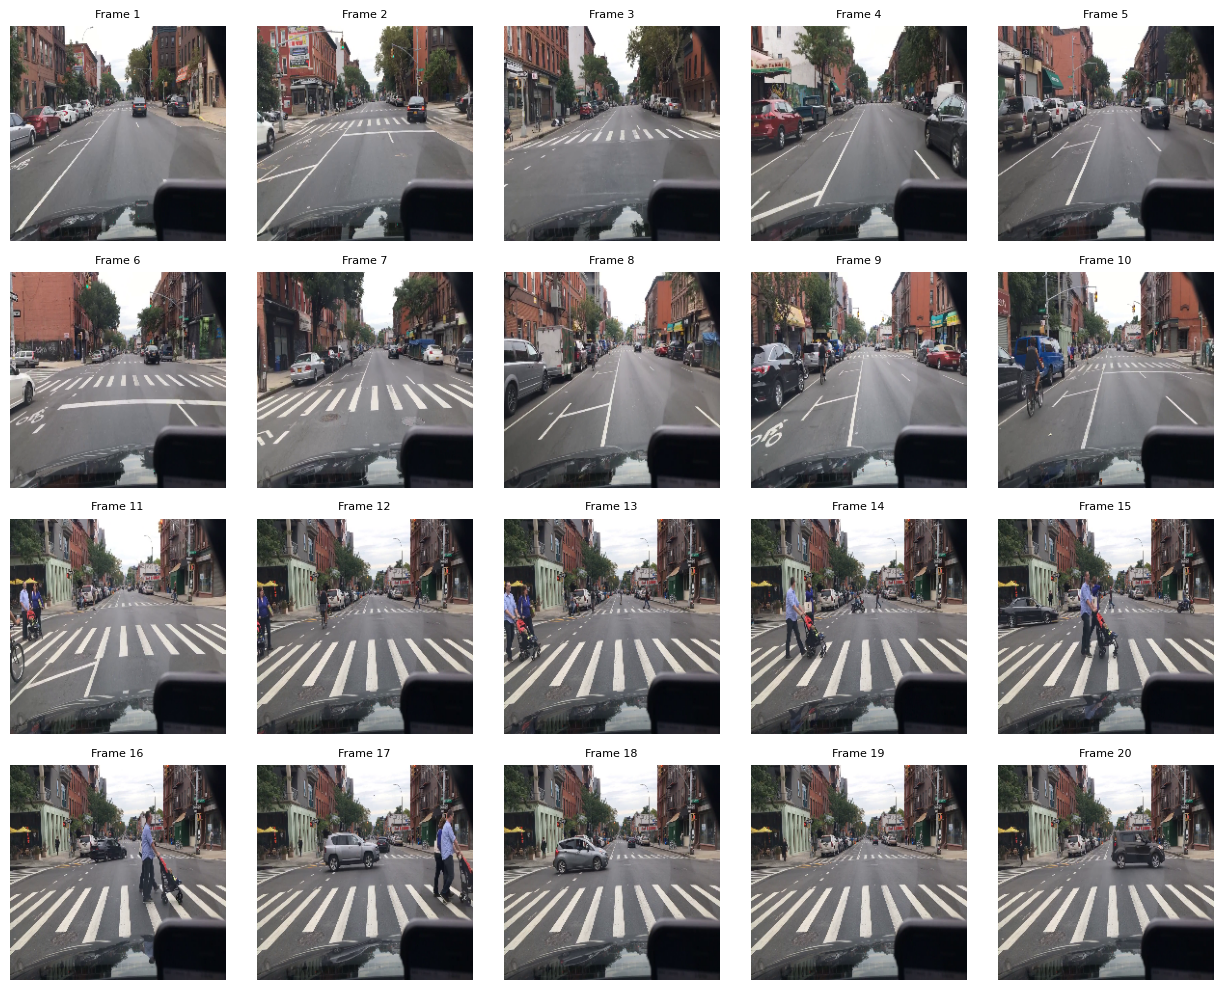

All frames displayed in a grid.


In [ ]:
import matplotlib.pyplot as plt
import cv2
import math

if 'frames' in locals() and len(frames) > 0:
    num_frames = len(frames)
    print(f"Displaying {num_frames} extracted frames in a grid...")

    # Calculate grid dimensions for a square-ish layout
    ncols = math.ceil(math.sqrt(num_frames))
    nrows = math.ceil(num_frames / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 2.5, nrows * 2.5)) # Adjust figsize as needed
    axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

    for i, frame in enumerate(frames):
        axes[i].imshow(frame)
        axes[i].set_title(f"Frame {i+1}", fontsize=8) # Smaller title font
        axes[i].axis('off') # Hide axes ticks and labels

    # Hide any unused subplots if the grid is larger than num_frames
    for j in range(num_frames, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    print("All frames displayed in a grid.")
else:
    print("No frames available to display.")

**1. What is cap?**

cap = cv2.VideoCapture(video_path)

Answer:

cap is a VideoCapture object created by OpenCV.

**2. What does cap.read() return?**

ret, frame = cap.read()

Answer:
**It returns two values:**

ret → Boolean

True if frame was read successfully

False if no more frames

frame → The actual image (NumPy array)

**So:**

ret tells if reading worked

frame contains pixel values of that frame

**3. total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))**

Answer:

It gets the total number of frames in the video.

cap.get() retrieves video properties.

cv2.CAP_PROP_FRAME_COUNT → property ID for total frame count.

**4. What is step doing?**

Answer:

It decides how many frames to skip.

**5. What does model.predict(frames) return?**

Answer:

It returns predictions for each frame.

in the shape (number_of_frames, 1000)


**6.What is the final output of classify_video()?**

Answer:

It prints:

Top 5 predicted classes

Their probabilities

Final top predicted class

**7. What does MobileNetV2(weights='imagenet') do?**

Answer:

It loads a pretrained MobileNetV2 convolutional neural network model with weights trained on the ImageNet dataset, allowing us to perform image classification without training the model from scratch